<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/Data_Augmentation_Modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Preprocessing Layers

- Keras Preprocessing Layers API : [https://keras.io/api/layers/preprocessing_layers/](https://keras.io/api/layers/preprocessing_layers/)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers.experimental.preprocessing as preprocessing

In [5]:
def visualize(image):
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(image)

In [6]:
import os

path = os.getcwd()
print(path)

/content


In [7]:
os.chdir('/content/drive/Shareddrives/TNT/스터디/2021년 1학기/CV 팀/발제/2주차')
path = os.getcwd()
print(path)

/content/drive/Shareddrives/TNT/스터디/2021년 1학기/CV 팀/발제/2주차


In [8]:
print(os.listdir(os.getcwd()))

['cat.jpg', 'mini_dog_vs_cats']


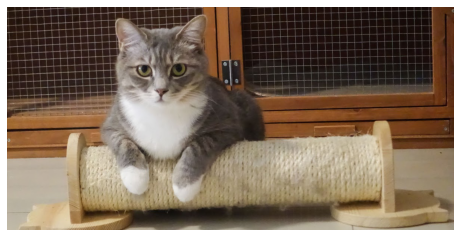

In [9]:
image = tf.keras.preprocessing.image.load_img('cat.jpg')
visualize(image)

In [10]:
# image to array
img_data = tf.keras.preprocessing.image.img_to_array(image)
print("image data shape :", img_data.shape)

image data shape : (600, 1200, 3)


## Resizing & Rescaling

TensorShape([300, 300, 3])

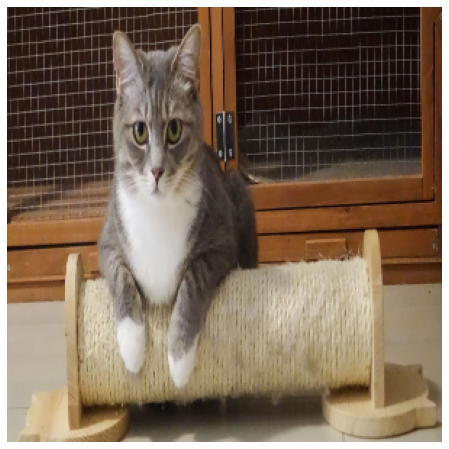

In [11]:
from tensorflow.keras import Sequential
IMG_SIZE = 300


resize_and_rescale = Sequential([
                                 preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
                                 preprocessing.Rescaling(1./255)
])

resize_and_rescale_img = resize_and_rescale(img_data)
visualize(resize_and_rescale_img)
resize_and_rescale_img.shape

In [12]:
aug_img = tf.expand_dims(resize_and_rescale_img, 0)
aug_img.shape

TensorShape([1, 300, 300, 3])

In [13]:
aug_rndflip = Sequential([
                          preprocessing.RandomFlip("horizontal_and_vertical")
])

aug_rndrot = Sequential([
                          preprocessing.RandomRotation(0.2, seed=220)
])

aug_rndcrop = Sequential([
                          preprocessing.RandomCrop(100, 100, seed=220)
])

aug_rndtrans = Sequential([
                          preprocessing.RandomTranslation(
                                                           (-0.2, 0.2),
                                                           (-0.2, 0.2),
                                                           fill_mode="reflect",
                                                           interpolation="bilinear",
                                                           seed=220, 
                          )                      
])

In [14]:
def visualization(image):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(image[0])

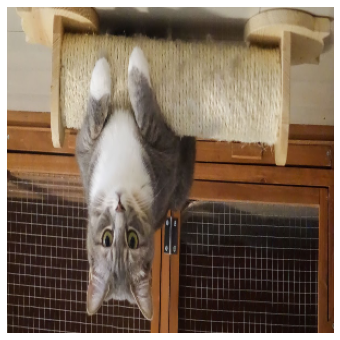

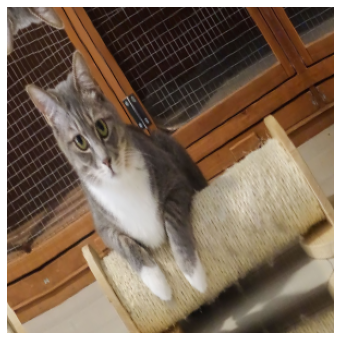

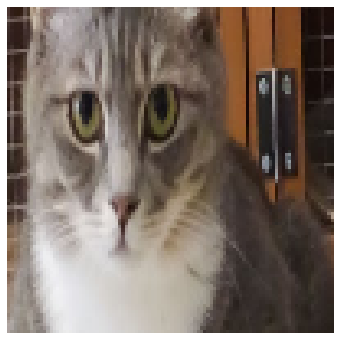

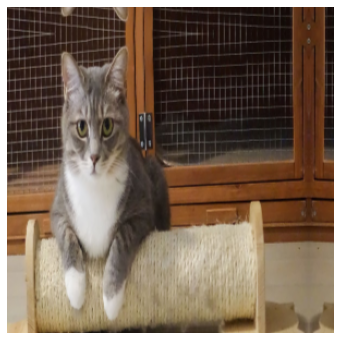

In [15]:
## Visualization
aug_rndflip_img =  aug_rndflip(aug_img)
visualization(aug_rndflip_img)

aug_rndrot_img = aug_rndrot(aug_img)
visualization(aug_rndrot_img)

aug_rndcrop_img = aug_rndcrop(aug_img)
visualization(aug_rndcrop_img)

aug_rndtrans_img = aug_rndtrans(aug_img)
visualization(aug_rndtrans_img)

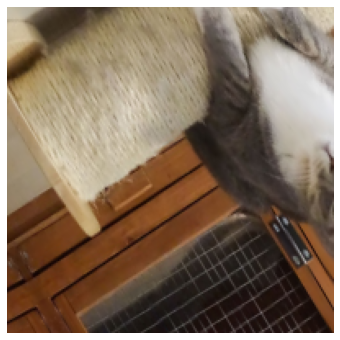

In [16]:
aug_combine = Sequential([
                          preprocessing.RandomFlip("horizontal_and_vertical"),
                          preprocessing.RandomRotation(0.2, seed=220),
                          preprocessing.RandomCrop(200, 200, seed=220)
])
aug_combine_img = aug_combine(aug_img)
visualization(aug_combine_img)

# 2. Albumentation

- 최근에 생성(2020년)
- Pytorch
- 성능 매우 좋으며, 70여 개의 전처리 기술

In [17]:
 pip install albumentations

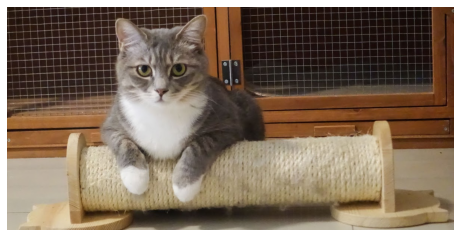

In [18]:
# cv2 를 기반으로 만들어진 Albumentations 패키지
import cv2

image = cv2.imread("cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

visualize(image)

In [19]:
import albumentations as A
import random

transform = A.Compose([
                       A.RandomCrop(width=256, height=256),
                       A.HorizontalFlip(p=0.5),
                       A.RandomBrightnessContrast(brightness_limit=1, p=0.2),
])

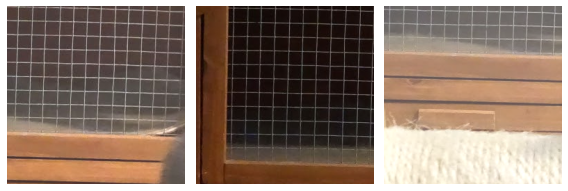

In [20]:
# Visualization
f, ax = plt.subplots(1, 3, figsize=(8, 8))
for i in range(3):
    transformed_image = transform(image=image)["image"]
    ax[i].imshow(transformed_image)
    ax[i].axis('off')

plt.tight_layout()

# 3. ImageDataGenerator

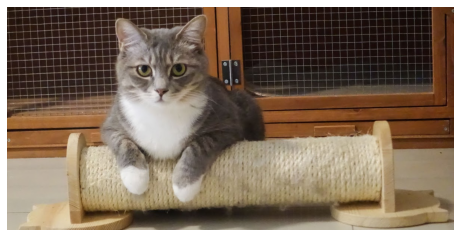

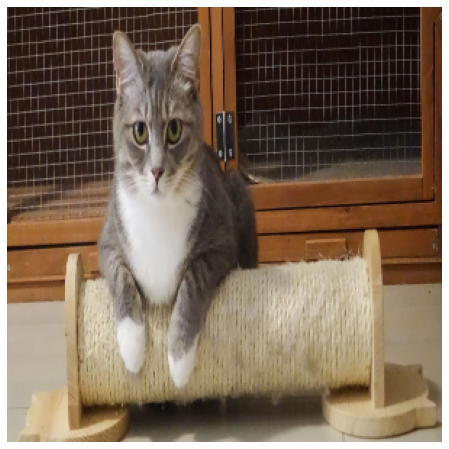

In [21]:
visualize(image)
visualize(resize_and_rescale_img)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
       
        rotation_range=10,  # 랜덤하게 10도 회전
        zoom_range = 0.1, # 랜덤하게 zoom
        width_shift_range=0.2,  # 랜덤하게 수평으로 shift
        height_shift_range=0.2,  # 랜덤하게 수직으로 shift
        horizontal_flip=True,  # 랜덤하게 수평으로 flip
        vertical_flip=False)  # 랜덤하게 수직으로 flip        

iterator = datagen.flow(aug_img, batch_size=1)

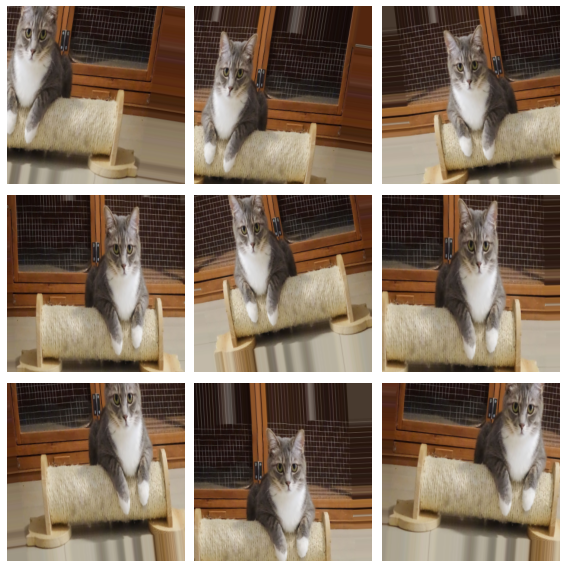

In [23]:
# Visualization
f, ax = plt.subplots(3, 3, figsize=(8, 8))
for i in range(3):
    for j in range(3):
        batch = iterator.next()
        batch_img = batch[0]
        ax[i][j].imshow(batch_img)
        ax[i][j].axis('off')

plt.tight_layout()

# Dog vs Cats (InceptionResnetV2)

### 라이브러리 불러오기

In [24]:
# manipulating images and getting numpy arrays of pixel values of images.
import cv2                  
from tqdm import tqdm
import os                   
from random import shuffle  
from PIL import Image

# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')

### 데이터 준비하기

In [67]:
base_dir = '/content/drive/Shareddrives/TNT/스터디/2021년 1학기/CV 팀/발제/2주차/mini_dog_vs_cats'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')

In [68]:
# train dir path
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# valid dir path
valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

print("Total train cat images : ", len(os.listdir(train_cats_dir)))
print("Total train dog images : ", len(os.listdir(train_dogs_dir)))
print("Total validation cat images : ", len(os.listdir(valid_cats_dir)))
print("Total validation dog images : ", len(os.listdir(valid_dogs_dir)))

Total train cat images :  500
Total train dog images :  501
Total validation cat images :  250
Total validation dog images :  250


In [69]:
# 라벨링 함수
def assign_label(img, flower_type):
    return flower_type

In [70]:
# train data 생성 함수
def make_train_data(data_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, data_type) 
        path = os.path.join(DIR, img)
        
        try:
            img = cv2.imread(path, cv2.IMREAD_COLOR) # 이미지 읽기
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # size 변환
        
            Train_images.append(np.array(img)) # numpy로 저장
            Train_labels.append(str(label)) # 라벨 저장
        
        # jpg 파일이 아닌 경우 에러 핸들링
        except Exception as e:
            print("error image")
            print(e)

In [71]:
# train data 생성 함수
def make_valid_data(data_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, data_type) 
        path = os.path.join(DIR, img)
        
        try:
            img = cv2.imread(path, cv2.IMREAD_COLOR) # 이미지 읽기
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # size 변환
        
            Valid_images.append(np.array(img)) # numpy로 저장
            Valid_labels.append(str(label)) # 라벨 저장
        
        # jpg 파일이 아닌 경우 에러 핸들링
        except Exception as e:
            print("error image")
            print(e)

In [72]:
Train_images = [] 
Train_labels = []

Valid_images = []
Valid_labels = []

IMG_SIZE = 224 # img size 설정

In [73]:
make_train_data('dogs', train_dogs_dir)
make_train_data('cats', train_cats_dir)

100%|██████████| 500/500 [00:02<00:00, 195.11it/s]


In [74]:
print("Total train image number :", len(Train_images))

Total train image number : 1001


In [75]:
make_valid_data('dogs', valid_dogs_dir)
make_valid_data('cats', valid_cats_dir)

100%|██████████| 250/250 [00:01<00:00, 195.21it/s]


In [76]:
print("Total validation image number :", len(Valid_images))

Total validation image number : 500


### 시각화

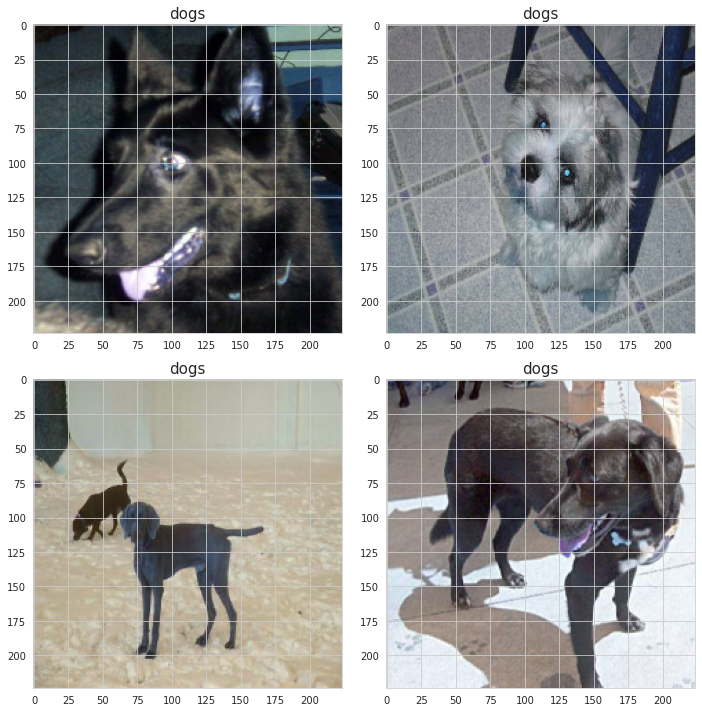

In [78]:
f, ax = plt.subplots(2, 2, figsize = (10, 10))

for i in range(2):
    for j in range (2):
        l = random.randint(0, len(Train_labels))
        ax[i, j].imshow(Train_images[l])
        ax[i, j].set_title(Train_labels[l], size = 15)
        
plt.tight_layout()

### 데이터 전처리 및 준비

In [79]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
y_train = le.fit_transform(Train_labels)
y_valid = le.fit_transform(Valid_labels)

In [80]:
# Normalization
X_train = np.array(Train_images) / 255.
X_valid = np.array(Valid_images) / 255.

In [81]:
X_train.shape, X_valid.shape

((1001, 224, 224, 3), (500, 224, 224, 3))

In [82]:
y_train.shape, y_valid.shape

((1001,), (500,))

### 데이터 어그멘테이션

In [83]:
# Data Augmentation

datagen=ImageDataGenerator(
       
    rotation_range=20,  # 랜덤하게 10도 회전
    zoom_range = 0.2, # 랜덤하게 zoom
    width_shift_range=0.2,  # 랜덤하게 수평으로 shift
    height_shift_range=0.2,  # 랜덤하게 수직으로 shift
    horizontal_flip=True,  # 랜덤하게 수평으로 flip
    vertical_flip=False,   # 랜덤하게 수직으로 flip  
)

datagen.fit(X_train)

In [84]:
# LR 콜백함수
from keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.1)

### 모델링

In [85]:
# DL libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

# CNN libraries
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [98]:
from tensorflow.keras.applications import InceptionResNetV2

In [99]:
inception_resnet_v2 = InceptionResNetV2(
    include_top=False, weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
)

inception_resnet_v2.trainable=False

In [100]:
model_inception_resnet_v2 = Sequential([
    inception_resnet_v2, 
    
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [101]:
model_inception_resnet_v2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
batch_sizes = 128
epochs = 10

history = model_inception_resnet_v2.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_sizes),
                                                  epochs=epochs, 
                                                  validation_data=(X_valid, y_valid),
                                                  verbose = 1, 
                                                  steps_per_epoch=X_train.shape[0]//batch_sizes,
                                                  callbacks=[reduceLR])

Epoch 1/10
7/7 [==============================] - 25s 2s/step - loss: 6.9738 - accuracy: 0.5833 - val_loss: 0.5510 - val_accuracy: 0.9780
Epoch 2/10
7/7 [==============================] - 13s 2s/step - loss: 1.3030 - accuracy: 0.9349 - val_loss: 0.4100 - val_accuracy: 0.9880
Epoch 3/10
7/7 [==============================] - 13s 2s/step - loss: 1.6630 - accuracy: 0.9384 - val_loss: 0.3048 - val_accuracy: 0.9880
Epoch 4/10
7/7 [==============================] - 13s 2s/step - loss: 0.7405 - accuracy: 0.9644 - val_loss: 0.2388 - val_accuracy: 0.9880
Epoch 5/10
7/7 [==============================] - 13s 2s/step - loss: 0.7663 - accuracy: 0.9574 - val_loss: 0.2258 - val_accuracy: 0.9860

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/10
7/7 [==============================] - 13s 2s/step - loss: 0.7193 - accuracy: 0.9690 - val_loss: 0.2205 - val_accuracy: 0.9880
Epoch 7/10
7/7 [==============================] - 13s 2s/step - loss: 0.4488 - accuracy: 0

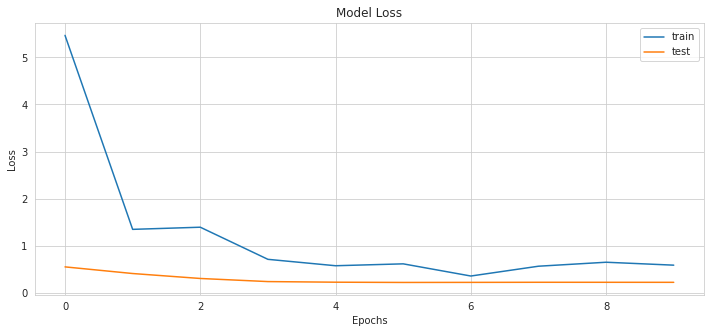

In [105]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

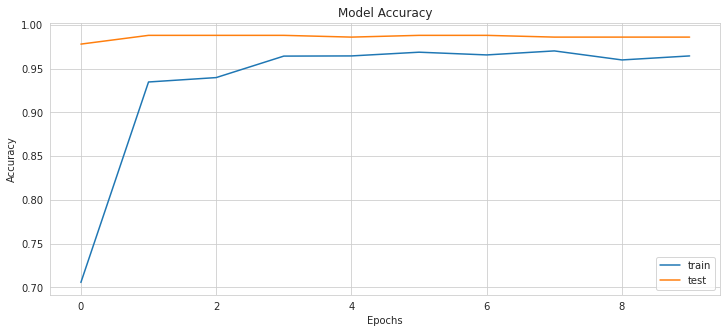

In [106]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()